<img src="../dsi.png" style="height:128px;">

# Lesson 10: Case Study

You’ve learned a lot about data science in this course! Now, you’ll get the chance to go over the topics we covered while analyzing real-world data. We’re going to be looking at some data about engineers in India from the Aspiring Minds Employability Outcomes Survey (http://research.aspiringminds.com/resources/#ameo). This dataset contains information about their salaries, positions, academic performance, and much more!


Making tables/graphs for the worksheet 

In [56]:
import numpy as np
from datascience import *
from matplotlib import pyplot as plt
import random
%matplotlib inline
plt.style.use('fivethirtyeight')

In [57]:
salaries = Table().read_table("engineering_data.csv").drop(0).where("JobCity", are.not_equal_to("-1"))


## Question 1

In [55]:
#Don't re-run the next line
salaries.take(random.sample(range(0, salaries.num_rows), 7)).drop(["DOJ", "DOL", "DOB"])

ID,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
1145718,100000,sales account manager,Sonipat,m,79.75,state board,2008,67.57,state board,7861,2,B.Tech/B.E.,mechanical engineering,72.31,7861,1,West Bengal,2015,605,455,175,0.598281,385,-1,-1,407,-1,-1,-1,1.1336,0.0459,-0.1437,-0.3612,-0.4776
1029968,205000,javascript developer,Chennai,m,60.2,state board,2010,65,state board,9259,2,B.Tech/B.E.,information technology,75,9259,0,Tamil Nadu,2014,300,335,345,0.356536,375,-1,346,-1,-1,-1,-1,-0.0154,1.2114,0.9322,0.0192,1.4386
980852,200000,business process analyst,Gurgaon,m,82.8,cbse,2009,77.2,cbse,7557,2,B.Tech/B.E.,electronics and electrical engineering,71.51,7557,1,New Delhi,2014,430,650,605,0.298769,445,-1,-1,-1,356,-1,-1,-1.0208,-0.6201,0.1637,1.0333,1.0554
215660,105000,java software engineer,Kolkata,m,69.2,jharkhand academic council,2007,58.6,jharkhand academic council,5026,2,B.Tech/B.E.,electronics and communication engineering,63,5026,0,Orissa,2011,605,435,505,0.538387,305,333,-1,-1,-1,233,-1,0.2009,-0.4353,-0.0537,1.1199,0.3444
346596,220000,associate software engineer,Bangalore,m,69.4,icse,2008,65.12,karnataka pre-university board,8811,2,B.Tech/B.E.,computer engineering,65.5,8811,1,Karnataka,2012,585,645,475,0.793581,495,-1,-1,-1,-1,-1,-1,-0.5332,0.5008,-0.9245,-0.2609,-0.9194
1120553,300000,software engineer,Pune,f,73,cbse,2009,60,cbse,23,2,B.Tech/B.E.,electronics and communication engineering,73,23,0,Uttar Pradesh,2013,440,400,270,0.991398,-1,516,284,-1,-1,-1,-1,-0.0154,0.3789,0.3174,0.5262,-0.8608
416714,300000,system engineer,Kolkata,m,64.4,jharkhand secondary education board,2005,53,jharkhand academic council,8926,2,MCA,computer application,71,8926,1,West Bengal,2012,375,535,625,0.90149,545,-1,-1,-1,-1,-1,-1,-0.1855,0.6568,-0.7794,0.1798,0.0284


In [56]:
print(salaries.num_rows)

3537


## Question 2

In [120]:
top_10_cities = salaries.group("JobCity").sort("count", descending = True).take(np.arange(10))
averaged = salaries.group("JobCity", np.mean).where("JobCity", are.contained_in(top_10_cities.column(0))).column("Salary mean")
top_10_cities = top_10_cities.with_column("Average Salary (Rupees)", averaged)
np.average(top_10_cities.where("JobCity", lambda c : c == "New Delhi" or c == "Gurgaon" or c == "Noida").column(
"Average Salary (Rupees)"))


302270.10284488456

12747
7005
6469
5063
5051
4036
['Delhi' 'Mumbai' 'Chennai' 'Hyderabad' 'Bangalore' 'Kolkata' 'Jaipur'
 'Pune']
[ 751210.0281      412820.7615      381233.0487      298374.2349
  297667.0473      237850.7628        9454.54545455   13800.        ]


([<matplotlib.axis.YTick at 0x10f3c9be0>,
 <a list of 8 Text yticklabel objects>)

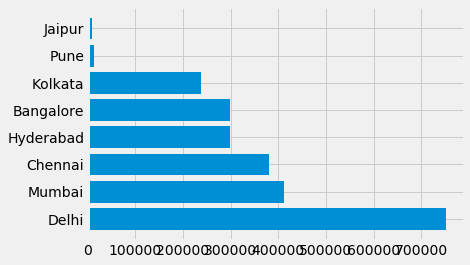

In [206]:
#Table Source: https://www.brookings.edu/wp-content/uploads/2015/01/bmpp_GMM_final.pdf
#Asking the students to do at least part of this themselves will be a cool example of how cleaning data is important too
city_gdp = Table().read_table("city_gdp.csv")
city_gdp = city_gdp.drop(0).drop(1).drop(1)
np.append(city_gdp.column(0), ["Jaipur", "Pune"])
#np.append(city_gdp.column(1), )
#Source for Jaipur/Pune GDP: https://www.brookings.edu/research/global-metro-monitor/
#Jaipur GDP (PPP adjusted): $31.2 b
#Jaipur Pop: http://indiapopulation2017.in/population-of-jaipur-2017.html, 3.30m
#Pune GDP: $69b
#Pune Pop: http://indiapopulation2017.in/population-of-pune-2017.html 5m
jp_gdp = np.array([31200000000, 69000000000])
jp_pop = np.array([3300000, 5000000])
#GDP Per Capita is calculated by dividing GDP per person
def gdp_per_capita(gdp, pop):
    data = np.array([])
    for i in np.arange(0, 2):
        data = np.append(data, gdp[i] / pop[i])
    return data
per_capita = gdp_per_capita(jp_gdp, jp_pop)
jp = np.array(["Jaipur", "Pune"])
def convert_dollars(arr):
    converted = np.array([])
    for i in arr:
        i = i.replace("$","").replace(",", "")
        print(i)
        converted = np.append(i, converted)
    converted = converted.astype(np.int)[::-1] #Array was coming out reversed
    return converted * 58.9323
#Exchange rate: https://www.poundsterlinglive.com/best-exchange-rates/us-dollar-to-indian-rupee-exchange-rate-on-2014-05-29
gdp_rupees = np.append(convert_dollars(city_gdp.column(1)), per_capita)
#Combine the column of GDP in rupees w/Jaipur and Pune's GDPs
cities = np.append(city_gdp.column(0), jp)
print(cities)
print(gdp_rupees)
cleaned = Table().with_columns("City", cities, "GDP per capita", gdp_rupees).sort(1, descending = True)
#cleaned.bar("City")
plt.barh(np.arange(cleaned.num_rows), cleaned.column(1))
plt.yticks(np.arange(cleaned.num_rows), cleaned.column(0))


In [48]:
#Don't re-run this
job_cities = salaries.select("JobCity", "CollegeState").take(random.sample(range(0, salaries.num_rows), 12))
job_cities.show()

JobCity,CollegeState
Hyderabad,Telangana
New Delhi,Uttar Pradesh
Pune,Orissa
New Delhi,New Delhi
Ahmednagar,Uttar Pradesh
Hyderabad,Andhra Pradesh
Chandigarh,Uttarakhand
Hyderabad,Uttar Pradesh
Gurgaon,Uttar Pradesh
Sonipat,Haryana


In [52]:
job_states = np.array(["Telangana", "New Delhi", "Maharashtra", "New Delhi", "Maharashtra", "Telangana", "Punjab", 
              "Telangana", "Haryana", "Haryana", "Gujarat", "Tamil Nadu"])

In [54]:
job_cities.with_column("JobState", job_states).show()

JobCity,CollegeState,JobState
Hyderabad,Telangana,Telangana
New Delhi,Uttar Pradesh,New Delhi
Pune,Orissa,Maharashtra
New Delhi,New Delhi,New Delhi
Ahmednagar,Uttar Pradesh,Maharashtra
Hyderabad,Andhra Pradesh,Telangana
Chandigarh,Uttarakhand,Punjab
Hyderabad,Uttar Pradesh,Telangana
Gurgaon,Uttar Pradesh,Haryana
Sonipat,Haryana,Haryana


## Question 3

In [16]:
for i in ["ElectricalEngg", "ComputerScience", "CivilEngg", "MechanicalEngg"]:
    tbl = salaries.where(i, are.not_equal_to(-1))
    print("Number of Unique Professions " + i, tbl.group("Designation").num_rows)
    print("r " + i, calc_r(tbl, i, "Salary"))


Number of Unique Professions ElectricalEngg 87
r ElectricalEngg 0.242604625626
Number of Unique Professions ComputerScience 161
r ComputerScience 0.128899744755
Number of Unique Professions CivilEngg 24
r CivilEngg 0.246086564427
Number of Unique Professions MechanicalEngg 90
r MechanicalEngg 0.182627170214


In [8]:
#These should be implemented by students
#Calculating distance from the mean, dividing by standard deviation
def standard_units(nums):
    return (nums - np.mean(nums))/np.std(nums)
#Average of the product of x and y values in standard units 
def calc_r(tbl, col_1, col_2):
    return np.mean(standard_units(tbl.column(col_1)) * standard_units(tbl.column(col_2)))

In [29]:
salary_12 = salaries.where("12board", are.equal_to("cbse")).select("Salary", "12percentage")
r12 = calc_r(salary_12, "12percentage", "Salary")
print("r- 12th grade CBSE ", r12)
salary_10 = salaries.where("10board", are.equal_to("cbse")).select("Salary", "10percentage")
r10 = calc_r(salary_10, "10percentage", "Salary")
print("r- 10th grade CBSE", r10)
college_cbse = salaries.where("12board", are.equal_to("cbse"))
print("r- collegeGPA", calc_r(college_cbse, "collegeGPA", "Salary"))

r- 12th grade CBSE  0.291328325835
r- 10th grade CBSE 0.288531200826
r- collegeGPA 0.22521889079


## Question 4

In [80]:
cost_of_living = Table().read_table("cost_of_living.csv")
#Source: https://www.numbeo.com/cost-of-living/country_result.jsp?country=India
cost_of_living

Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,Ahmedabad,29.26,6.61,18.18,31.59,20.84,55.58
2,Bangalore,30.64,9.68,20.39,33.42,19.5,85.76
3,Bhubaneswar,25.91,4.66,15.52,29.79,14.91,51.16
4,Chandigarh,29.65,6.41,18.29,31.42,20.38,63.36
5,Chennai,29,7.34,18.41,31.48,19.21,68.68
6,Coimbatore,25.12,5.73,15.64,26.61,15.49,46.49
7,New Delhi,33.1,9.97,21.79,33.04,26.02,68.13
8,Goa,28.93,7.65,18.53,31.22,21.98,52.73
9,Gurgaon,36.29,10.53,23.69,35.6,32.21,94.28
10,Hyderabad,27.16,6.49,17.05,29.35,17.82,65.45


In [81]:
averaged = salaries.group("JobCity", np.mean).where("JobCity",
                                                    are.contained_in(cost_of_living.column(1)))
processed = averaged.select("JobCity", "Salary mean").join("JobCity", cost_of_living, "City")
processed.drop("Rank").sort("Cost of Living Index", descending = True).show()

JobCity,Salary mean,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Gurgaon,335818,36.29,10.53,23.69,35.6,32.21,94.28
Mumbai,367347,33.25,23.72,28.59,35.84,23.96,63.7
Noida,298769,33.11,7.02,20.35,34.77,22.69,82.21
New Delhi,271689,33.1,9.97,21.79,33.04,26.02,68.13
Pune,330750,30.87,7.89,19.64,32.92,22.1,85.31
Bangalore,355471,30.64,9.68,20.39,33.42,19.5,85.76
Thane,345000,30.34,8.73,19.78,31.99,20.49,58.83
Chandigarh,320962,29.65,6.41,18.29,31.42,20.38,63.36
Ahmedabad,266667,29.26,6.61,18.18,31.59,20.84,55.58
Chennai,288701,29,7.34,18.41,31.48,19.21,68.68


In [69]:
calc_r(processed, "Cost of Living Plus Rent Index", "Salary mean")

0.27711335728288633

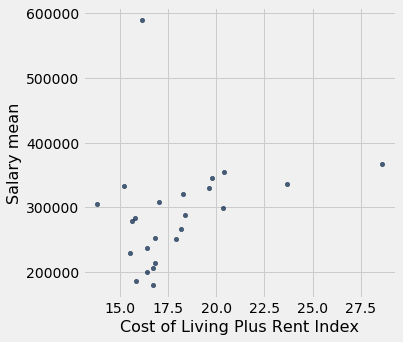

In [70]:
processed.scatter("Cost of Living Plus Rent Index", "Salary mean")

In [89]:
q4_tbl = processed.select("JobCity", "Cost of Living Plus Rent Index", "Salary mean").sort(1, descending = True)

In [93]:
np.std(q4_tbl.column(2))

81150.918565750631

In [ ]:
n